# Default Risk Rating with Machine Learning

## Applied Statistics

## Problem


A financial company asks you to perform a default risk rating. They have data about historic customer  behaviour at  the  time  of  the  loan  application. Before  they  award  new  loans, they predict the default risk based on this information. You  get  access  to  detailed  data  about 250,000 loans.  The  data  contains socio-economic characteristics,  employment  information,  and  wealth  status.  Furthermore,  you  observe whether a loan of the customer defaulted in the past or not. Your task as data analyst is to predict the default risk. For this purpose, you can use classical estimation  methods  and  more  advanced unsupervised  machine  learning  methods. The ultimate goal is to develop a tool, that enables the financial company to measure default risk in an easy interpretable way.


DATA :

- Microdata from internal records of the financial company.

- The data comprises information on past defaults, income, age, experience, marital status, property, employment, and residency.

- Additional data about  the  business  cycle  can  be  merged  based  on  regional information.



INDICATIVE BIBLIOGRAPHY

G.James, T.Hastie, D.Witten, R.J.Tibshirani (2021): An Introduction to Statistical Learning: With Applications in R, 2nd edition, Springer, https://www.statlearning.com/ 


### Framing the problem

...    

## Getting the data

In [ ]:
import pandas as pd
import numpy as np
import copy as c
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import io
%matplotlib widget

In [ ]:
with open(r"data/description.txt") as f:
    contents = f.read()
    print(contents)

CONTEXT
An organization wants to predict who possible defaulters are for the consumer loans product. 
They have data about historic customer behavior based on what they have observed. 
Hence when they acquire new customers they want to predict who is riskier and who is not.

CONTENT
All values were provided at the time of the loan application.

Column			Description					Type
income			Income of the user				int
age			Age of the user					int
experience		Professional experience of the user in years	int
profession		Profession					string
married			Whether married or single			string
house_ownership		Owned or rented or neither			string
car_ownership		Does the person own a car			string
risk_flag		Defaulted on a loan				string
currentjobyears		Years of experience in the current job		int
currenthouseyears	Number of years in the current residence	int
city			City of residence				string
state			State of residence				string

The risk_flag indicates whether there has been a default in the past or not.


In [ ]:
url = "https://raw.githubusercontent.com/frbm/statapp-default-risk/main/data/default%20data.csv?token=GHSAT0AAAAAABT42Y2AE77Y3EGWJYT4UKAOYTJBNOA"
data = pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')), index_col = "Id")
data.head()

Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
Id                                                                          
1   1303834   23           3         single          rented            no   
2   7574516   40          10         single          rented            no   
3   3991815   66           4        married          rented            no   
4   6256451   41           2         single          rented           yes   
5   5768871   47          11         single          rented            no   

             Profession                 CITY           STATE  CURRENT_JOB_YRS  \
Id                                                                              
1   Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
2    Software_Developer             Parbhani     Maharashtra                9   
3      Technical_writer            Alappuzha          Kerala                4   
4    Software_Developer          Bhubaneswar          Odisha                2   
5         Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

    CURRENT_HOUSE_YRS  Risk_Flag  
Id                                
1                  13          0  
2                  13          0  
3                  10          0  
4                  12          1  
5                  14          1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


The dataset contains no missing values.

In [ ]:
data.describe()

Income            Age     Experience  CURRENT_JOB_YRS  \
count  2.520000e+05  252000.000000  252000.000000    252000.000000   
mean   4.997117e+06      49.954071      10.084437         6.333877   
std    2.878311e+06      17.063855       6.002590         3.647053   
min    1.031000e+04      21.000000       0.000000         0.000000   
25%    2.503015e+06      35.000000       5.000000         3.000000   
50%    5.000694e+06      50.000000      10.000000         6.000000   
75%    7.477502e+06      65.000000      15.000000         9.000000   
max    9.999938e+06      79.000000      20.000000        14.000000   

       CURRENT_HOUSE_YRS      Risk_Flag  
count      252000.000000  252000.000000  
mean           11.997794       0.123000  
std             1.399037       0.328438  
min            10.000000       0.000000  
25%            11.000000       0.000000  
50%            12.000000       0.000000  
75%            13.000000       0.000000  
max            14.000000       1.000000

## Data transformation

In [ ]:
data_1h = data.copy()
data_1h['is_married'] = data_1h['Married/Single'].apply(lambda x : 0 if x == 'single' else 1)
data_1h['house_owned'] = data_1h['House_Ownership'].apply(lambda x : 0 if x == 'owned' else 1)
data_1h['house_rented'] = data_1h['House_Ownership'].apply(lambda x : 0 if x == 'rented' else 1)
data_1h['owns_car'] = data_1h['Car_Ownership'].apply(lambda x : 0 if x == 'no' else 1)

for profession in np.unique(data['Profession']):
    data_1h['p_'+profession.lower()] = data_1h['Profession'].apply(lambda x : 1 if x == profession else 0)

for state in np.unique(data['STATE']):
    data_1h['s_'+state.lower()] = data_1h['STATE'].apply(lambda x : 1 if x == state else 0)

In [ ]:
data_1h = data_1h.drop(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'STATE', 'CITY'], axis=1)
data_1h = data_1h.rename(columns={'Income': 'income', 'Age': 'age', 'Experience': 'experience', 'CURRENT_JOB_YRS': 'job_years', 'CURRENT_HOUSE_YRS': 'house_years', 'Risk_Flag': 'defaulter'})
data_1h.head()

income  age  experience  job_years  house_years  defaulter  is_married  \
Id                                                                            
1   1303834   23           3          3           13          0           0   
2   7574516   40          10          9           13          0           0   
3   3991815   66           4          4           10          0           1   
4   6256451   41           2          2           12          1           0   
5   5768871   47          11          3           14          1           0   

    house_owned  house_rented  owns_car  ...  s_punjab  s_rajasthan  s_sikkim  \
Id                                       ...                                    
1             1             0         0  ...         0            0         0   
2             1             0         0  ...         0            0         0   
3             1             0         0  ...         0            0         0   
4             1             0         1  ...         0            0         0   
5             1             0         0  ...         0            0         0   

    s_tamil_nadu  s_telangana  s_tripura  s_uttar_pradesh  s_uttar_pradesh[5]  \
Id                                                                              
1              0            0          0                0                   0   
2              0            0          0                0                   0   
3              0            0          0                0                   0   
4              0            0          0                0                   0   
5              1            0          0                0                   0   

    s_uttarakhand  s_west_bengal  
Id                                
1               0              0  
2               0              0  
3               0              0  
4               0              0  
5               0              0  

[5 rows x 90 columns]

In [ ]:
data_1h.columns

Index(['income', 'age', 'experience', 'job_years', 'house_years', 'defaulter',
       'is_married', 'house_owned', 'house_rented', 'owns_car',
       'p_air_traffic_controller', 'p_analyst', 'p_architect',
       'p_army_officer', 'p_artist', 'p_aviator', 'p_biomedical_engineer',
       'p_chartered_accountant', 'p_chef', 'p_chemical_engineer',
       'p_civil_engineer', 'p_civil_servant', 'p_comedian',
       'p_computer_hardware_engineer', 'p_computer_operator', 'p_consultant',
       'p_dentist', 'p_design_engineer', 'p_designer', 'p_drafter',
       'p_economist', 'p_engineer', 'p_fashion_designer',
       'p_financial_analyst', 'p_firefighter', 'p_flight_attendant',
       'p_geologist', 'p_graphic_designer', 'p_hotel_manager',
       'p_industrial_engineer', 'p_lawyer', 'p_librarian', 'p_magistrate',
       'p_mechanical_engineer', 'p_microbiologist', 'p_official',
       'p_petroleum_engineer', 'p_physician', 'p_police_officer',
       'p_politician', 'p_psychologist', 'p_scient

## PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_pca = StandardScaler().fit_transform(data_1h[['income', 'age', 'experience', 'job_years', 'house_years']])
y_pca = data_1h['defaulter']]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pComponents = pca.fit_transform(X_pca)
pDF = pd.DataFrame(data = pComponents, columns = ['PC 1', 'PC 2'])
finalDF = pd.concat([pDF, y_pca], axis = 1)
finalDF['defaulter'] = finalDF['defaulter'].shift(-1)

In [ ]:
finalDF.head()

PC 1      PC 2  defaulter
0 -1.480199  1.732765        0.0
1  0.538836  0.838181        0.0
2 -1.212030 -1.628337        0.0
3 -1.785514  0.371091        1.0
4 -0.495744  1.131727        1.0

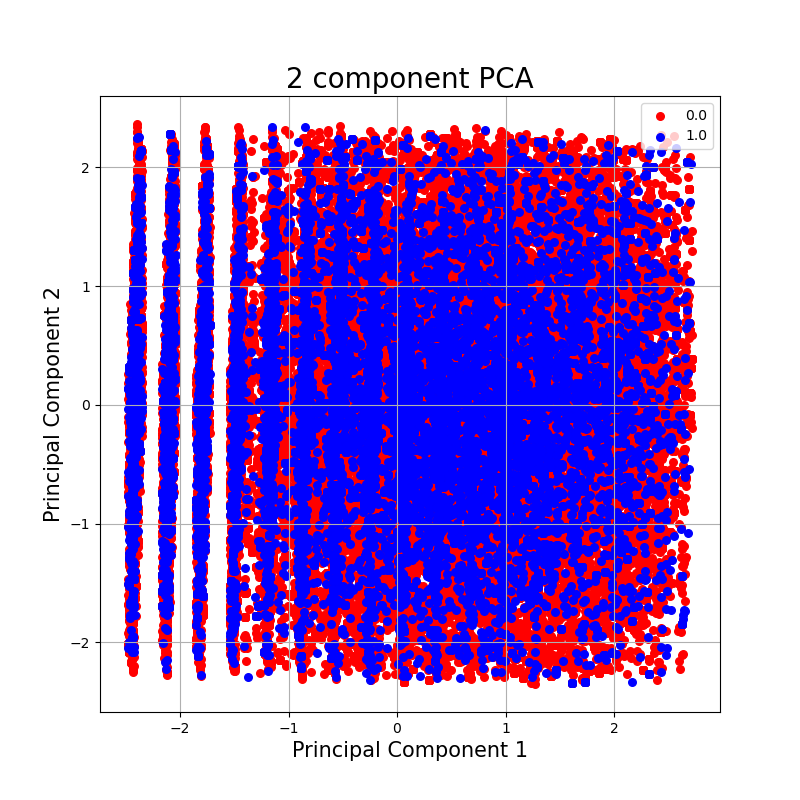

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2-component PCA', fontsize = 20)
targets = [0., 1.]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['defaulter'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'PC 1'], finalDF.loc[indicesToKeep, 'PC 2'], c = color, s = 30)
ax.legend(targets)
ax.grid()

## Data exploration

array([[<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'job_years'}>,
        <AxesSubplot:title={'center':'house_years'}>,
        <AxesSubplot:title={'center':'is_married'}>],
       [<AxesSubplot:title={'center':'owns_car'}>,
        <AxesSubplot:title={'center':'defaulter'}>, <AxesSubplot:>]],
      dtype=object)

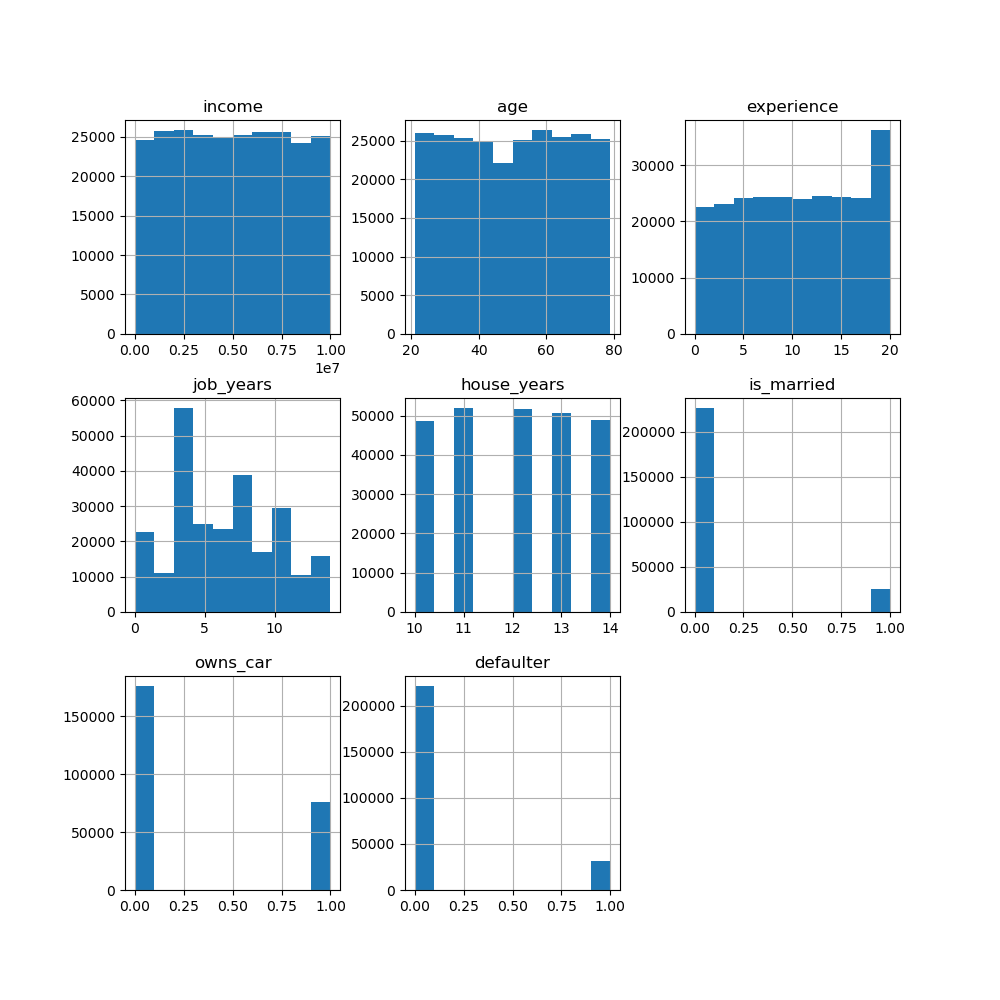

In [ ]:
data_1h[['income', 'age', 'experience', 'job_years', 'house_years', 'is_married', 'owns_car', 'defaulter']].hist(figsize=(10,10))

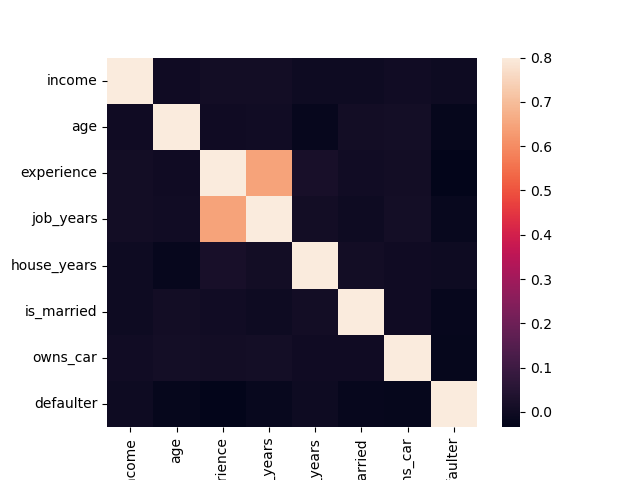

In [ ]:
corrmat = data_1h[['income', 'age', 'experience', 'job_years', 'house_years', 'is_married', 'owns_car', 'defaulter']].corr()
plt.figure()
sns.heatmap(corrmat, vmax=.8, square=True);

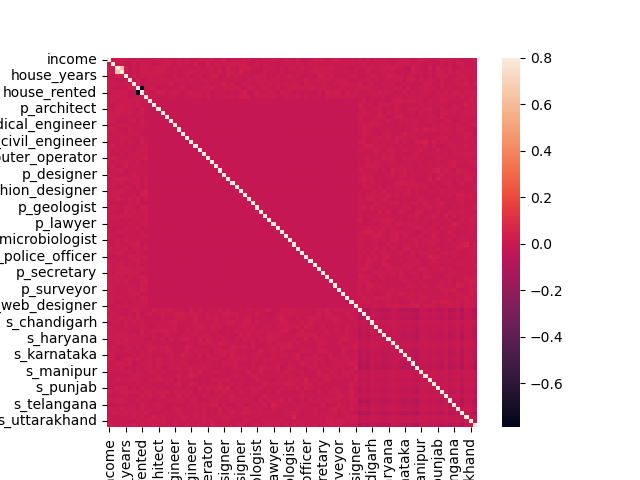

In [ ]:
corrmat = data_1h.corr()
plt.figure()
sns.heatmap(corrmat, vmax=.8, square=True);

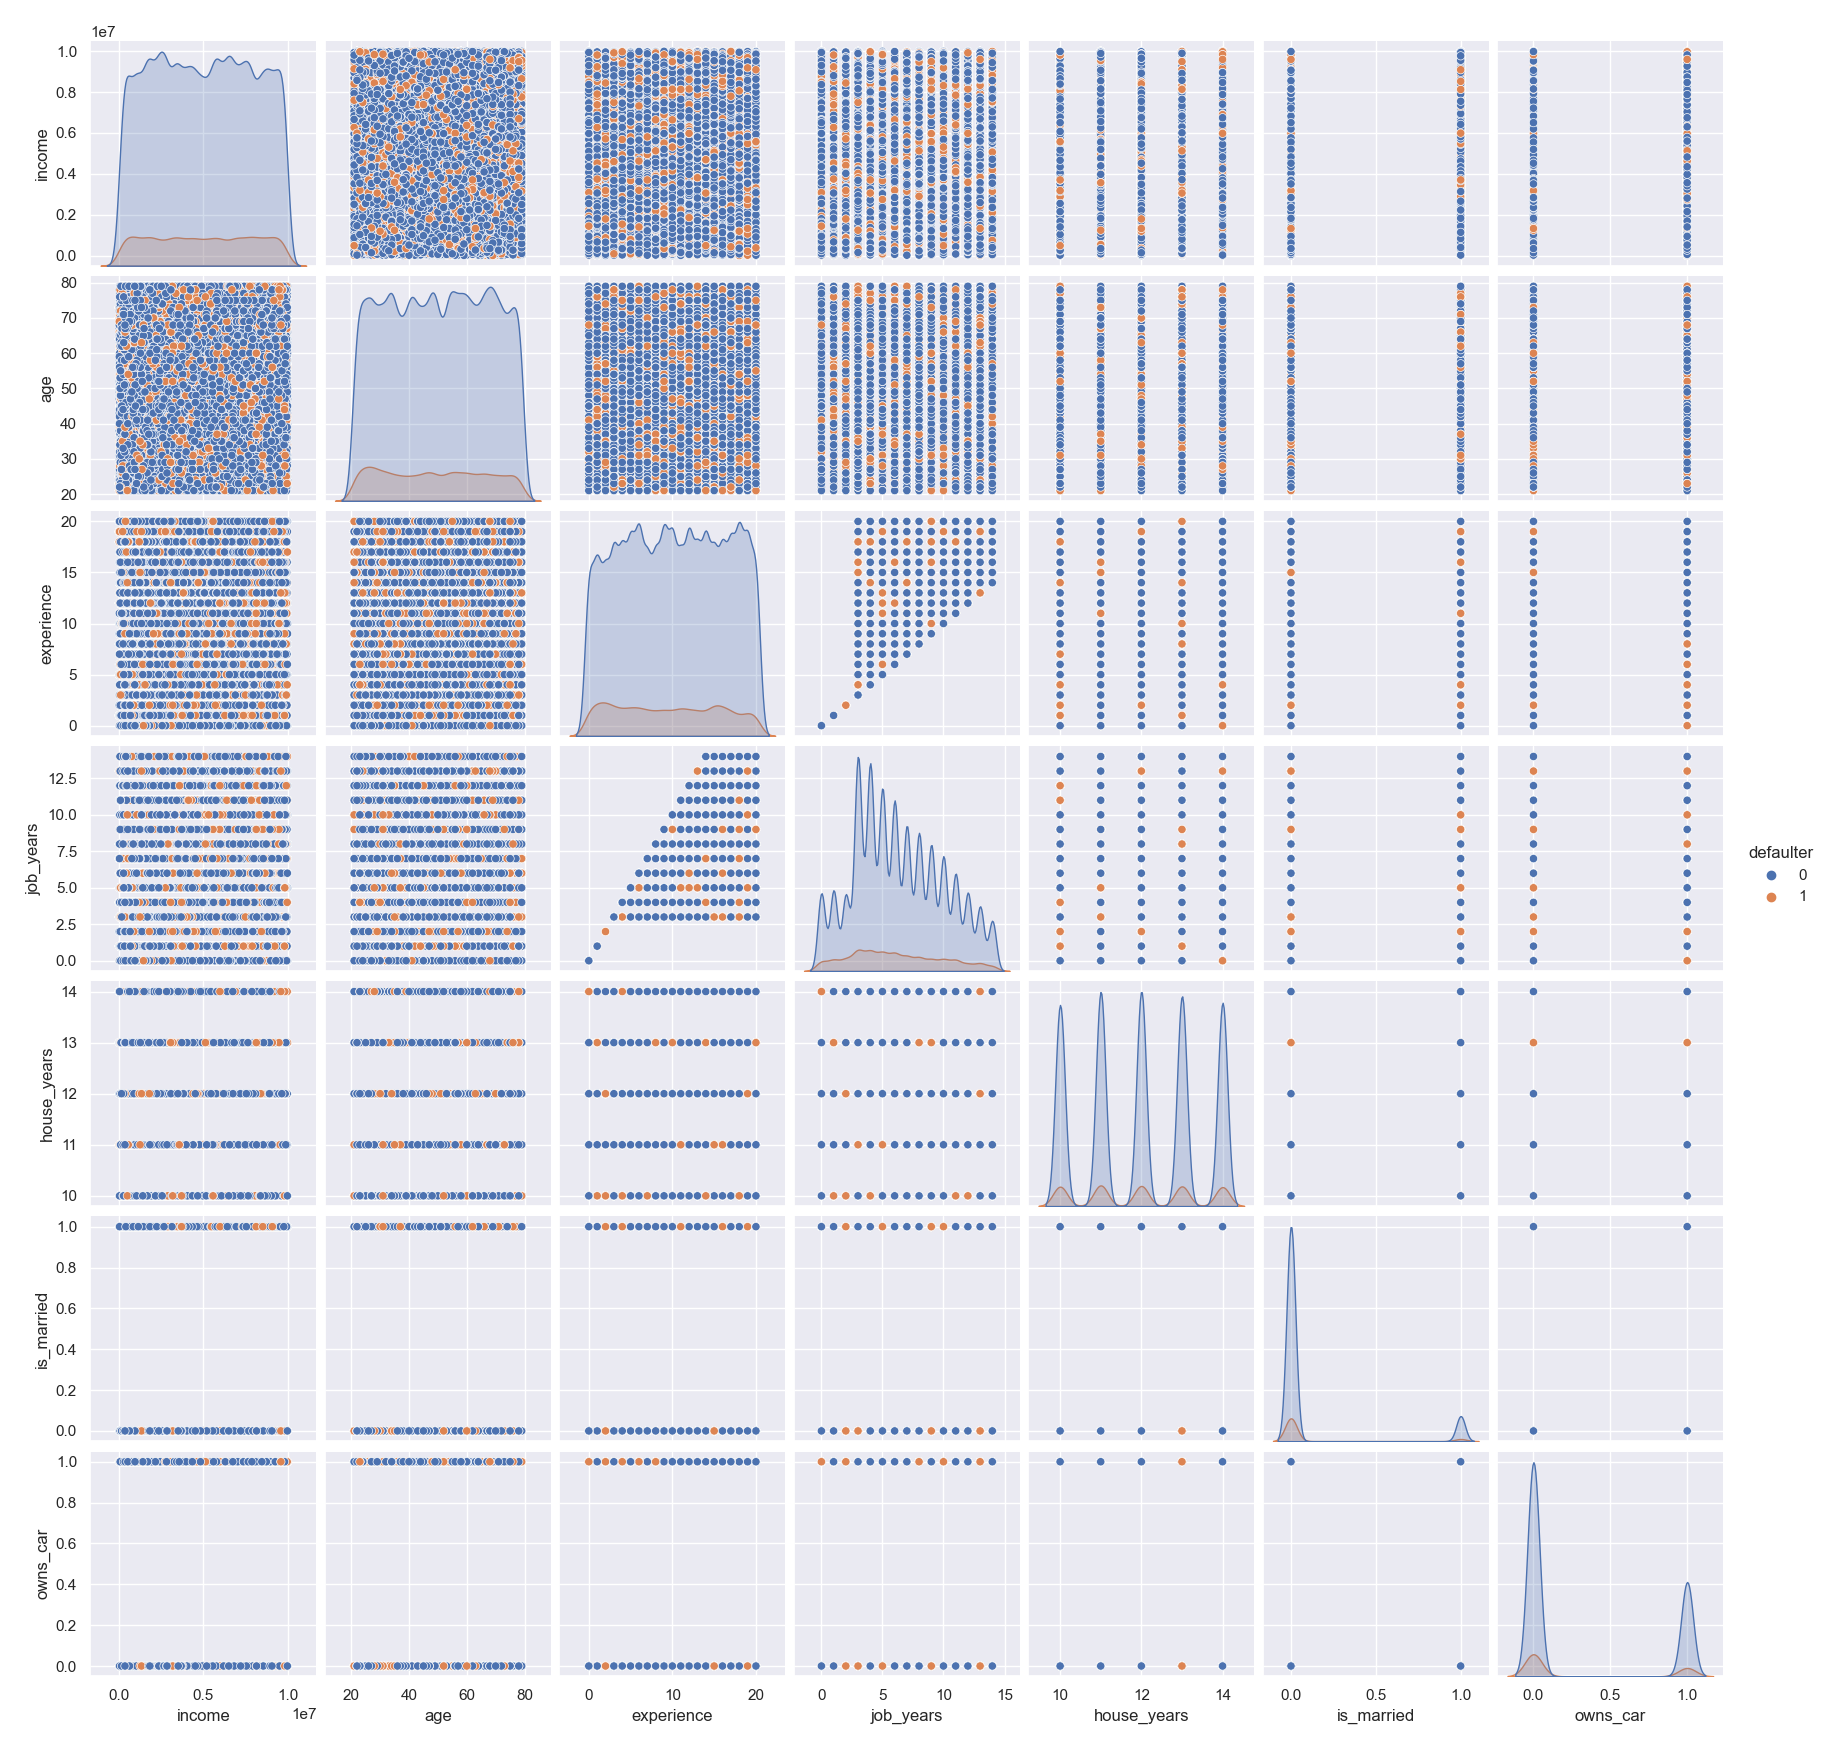

In [ ]:
#plt.figure()
#sns.pairplot(data_1h[['income', 'age', 'experience', 'job_years', 'house_years', 'is_married', 'owns_car', 'defaulter']], height = 2.5, hue='defaulter')

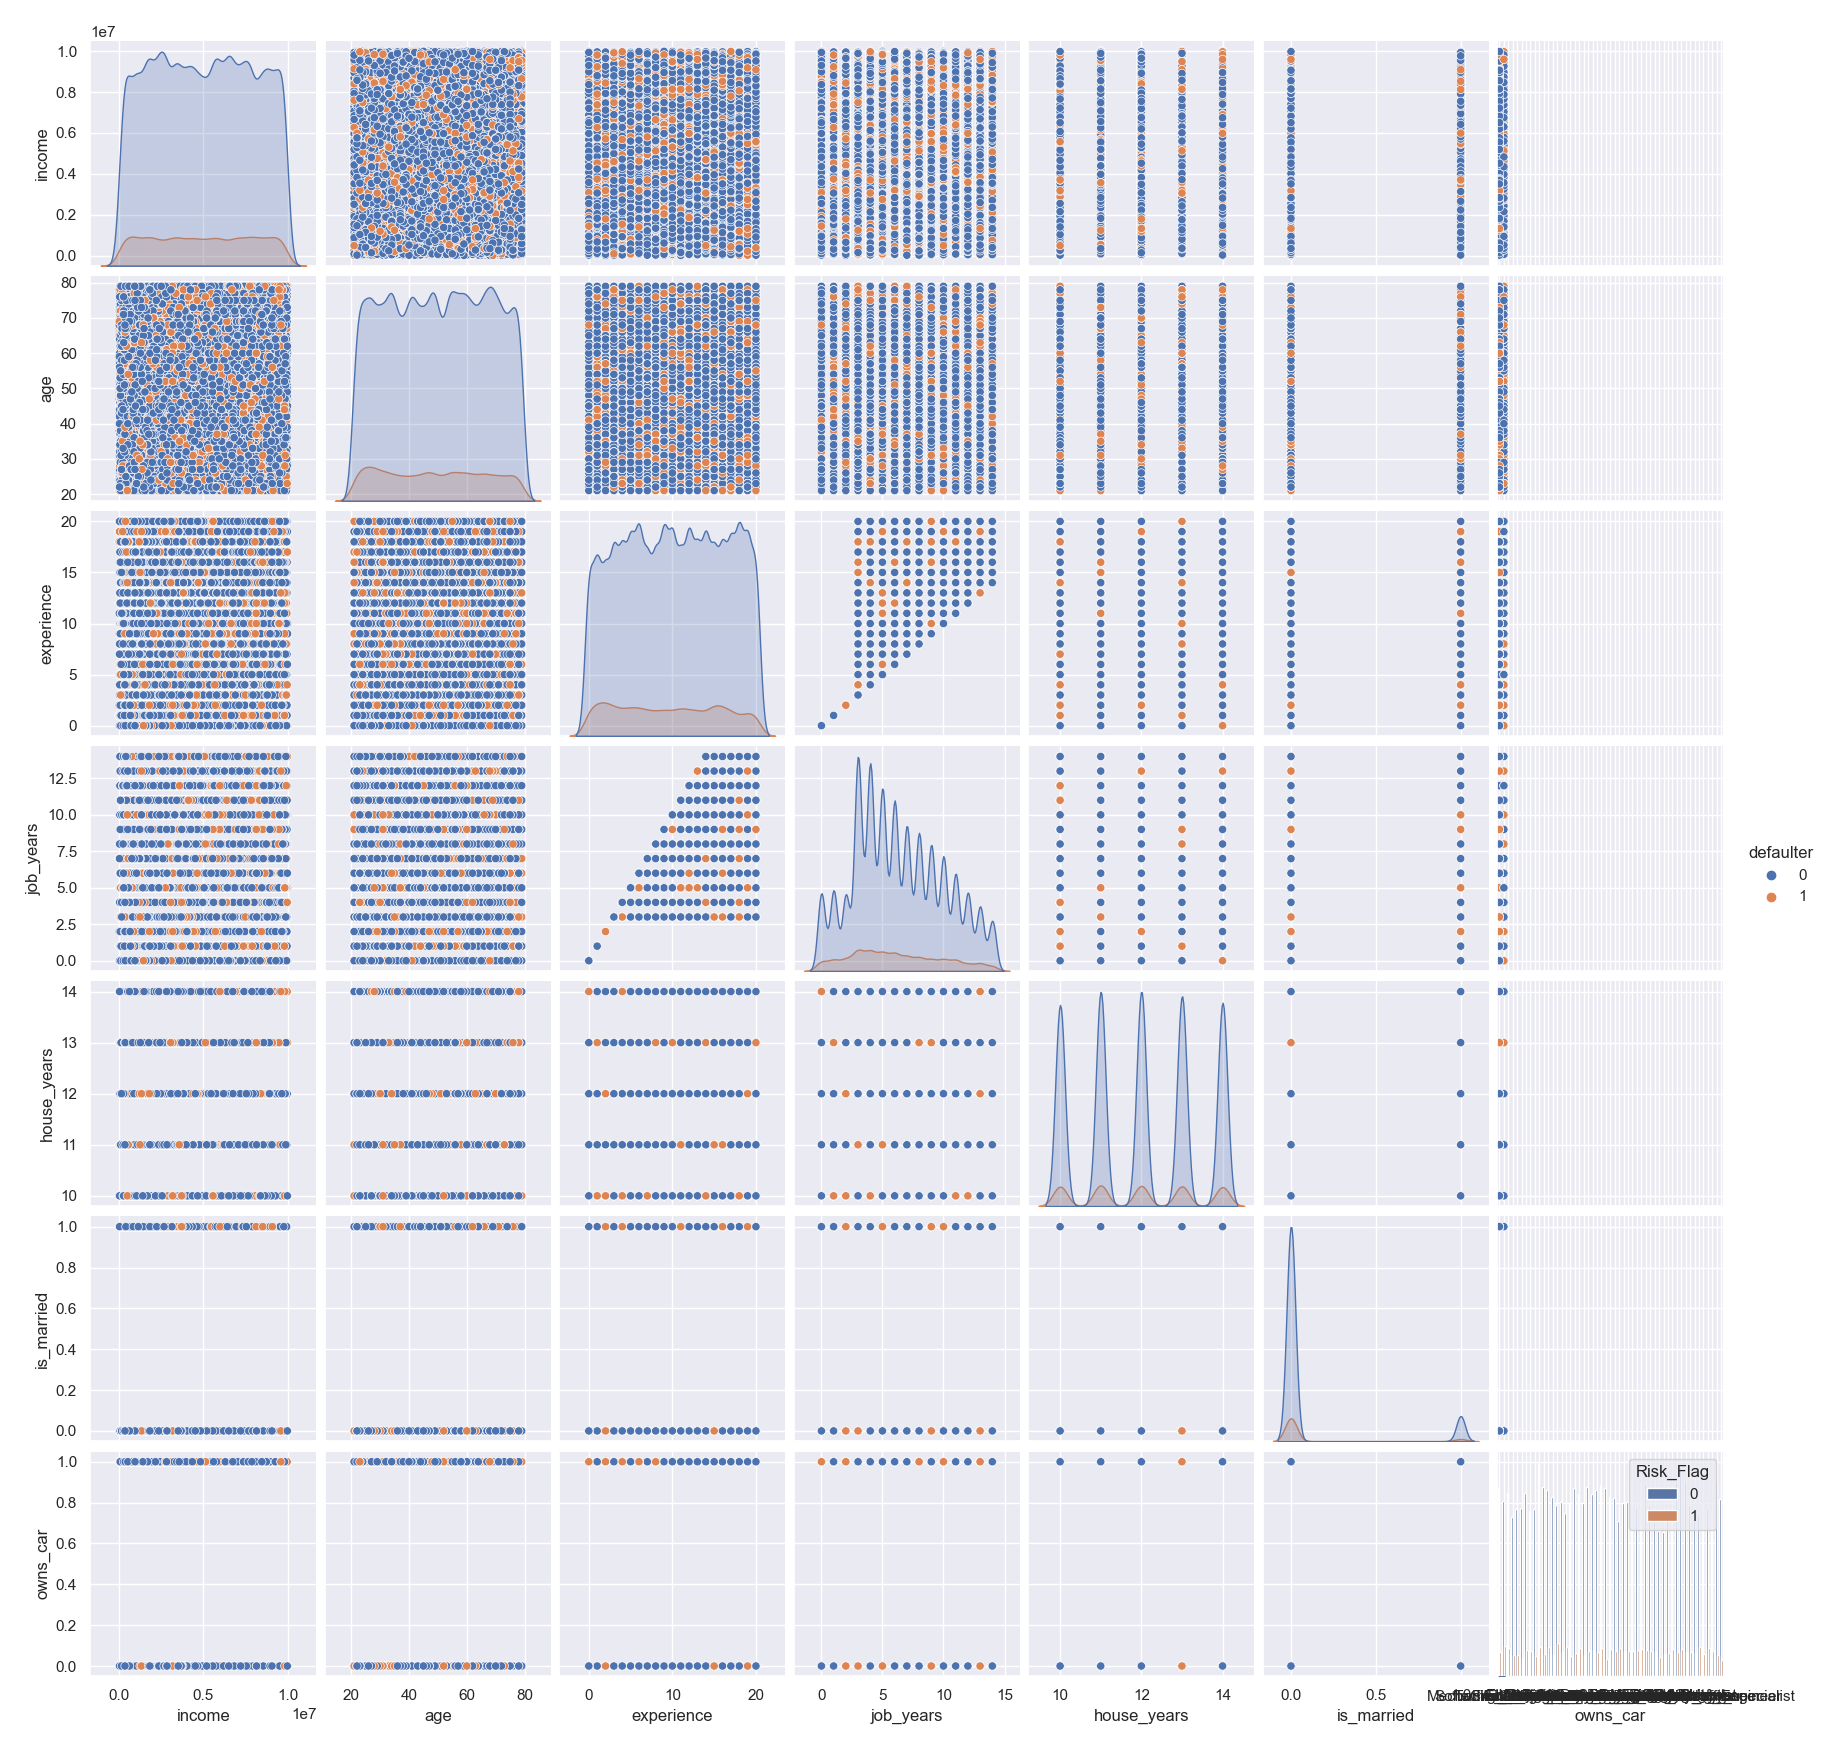

In [ ]:
#plt.figure()
#sns.countplot(x='Profession', hue='Risk_Flag', data=data)